# Изучение рынка заведений общественного питания Москвы

- Автор: Березинский Вадим Сергеевич
- Дата: 11.04.2025

### Цели и задачи проекта

**Цель исследования:** анализ рынка общественного питания Москвы для инвесторов, планирующих открыть новое заведение.

Результаты исследования должны помочь в выборе локации для нового объекта, типа заведения (кафе, ресторан, бар, кофейня), меню и ценовой полититики.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязи данных.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Анализ проводится на датасете с информацией о заведениях общественного питания Москвы, составленном на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

*Примечание: информация, размещённая в сервисе Яндекс Бизнес носит исключительно справочный характер, поскольку могла быть добавлена пользователями или найдена в общедоступных источниках*

**Файл `/datasets/rest_info.csv`** содержит информацию о заведениях общественного питания:

`name` — название заведения;

`address` — адрес заведения;

`district` — административный район, в котором находится заведение, например Центральный административный округ;

`category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;

`hours` — информация о днях и часах работы;

`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

`chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.

`seats` — количество посадочных мест.

**Файл `/datasets/rest_price.csv`** содержит информацию о среднем чеке в заведениях общественного питания:

`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

    -«Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».

`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержание проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## Загрузка данных и знакомство с ними

Загрузим данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [6]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [7]:
# Игнорируем предупреждение:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Выгружаем данные в переменные rest_df и price_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

**Познакомимся с данными датасета `rest_info.csv`, выведем первые строки и общую информацию.**

In [10]:
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [11]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 8406 строк и 9 столбцов. 

Метки столбцов нормализованы: названия уникальны, приведены к нижнему регистру и не требуют корректировки.

Данные соответствуют описанию, при этом помимо уже известных нам столбцов видим столбец `id`, который содержит уникальный идентификатор объекта и может использоваться для соединения датасетов, по нему также можно будет проверить датасет на явные дубликаты. 

Видим, что 7 из 9 столбцов не содержат пропущенных значений, пропуски встречаются в режиме работы `hours` и в информации о количестве посадочных мест `seats`. Данные о посадочных местах потребуются нам в дальнейшем при исследовании типичного количества посадочых мест для заведений разных категорий и изучения взаимосвязи с рейтингом, поэтому пропуски в этом столбце подлежат внимательному изучения. Данные о часах работы потребуются для выделения категории круглосуточных заведений и изучения связи режима работы с рейтингом заведения, поэтому пропуски в столбце `hours` также требуют внимания.

Данные представлены в следующих типах:

- **Числовые значения с плавающей точкой (`float64`).**
    - Столбец `rating`  содержит информацию о рейтинге заведения от 0 до 5, при этом рейтинг выражается дробным числм с округлением до одного знака после точки, в связи с этим тип `float64` является корректным.
    - Столбец `seats` содержит информацию о количестве посадочных мест и ему больше соответствует целочисленный тип данных, однако из-за пропусков данные содержатся в типе `float64` - рекомендуется после заполнения пропусков привести тип к целому числу и снизить разрядность.

- **Целочисленные данные (`int64`).**
    - Столбец `chain` содержит признак, указывающий, является ли заведение сетевым (1) или нет(0), для бинарных значение тип данных `int` является корректным, однако рекомендуется снизить разрядность в целях оптимизации.
 
- **Строковые данные (`object`).**
    - Столбцы `name`, `category`, `address` и `district` содержат текстовые данные о названии и категории заведения общественного питания, административном районе и адресе его размещения, тип `object` выбран корректно.
    - Столбец `id` содержит идентификатор объекта, однако помимо чисел идентификатор включает буквенные символы, поэтому представляет собой строки, то есть тип `object` выбран корректно.
    - Столбец `hours` содержит информацию о режиме работы, включающую как числа, так и текст, то есть тип `object` выбран корректно.

**Познакомимся с данными датасета `rest_price.csv`, выведем первые строки и общую информацию.**

In [14]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [15]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` состоит из 4058 строк и пяти столбцов. Обращает внимание, что количество строк вдвое меньше, чем в датасете `rest_info.csv`, в связи с чем при соединении датафреймов необходимо выбрать левый тип присоединения, чтобы сохранить полный объем данных.

Полностью заполнен только столбец `id`, четыре других столбца содержат пропуски. Неполнота данных может быть обусловлена источником данных - информация могла быть добавлена пользователями или найдена в общедоступных источниках. В связи с этим делать выводы на основе датасета `rest_price.csv` следует с оговоркой на справочный характер данных и их неполноту.

Данные представлены в следующих типах:

- **Числовые значения с плавающей точкой (`float64`).**
    - Столбцы `middle_avg_bill` и `middle_coffee_cup` содержат числа с оценкой среднего чека, при этом методология зполнения значений прямо предусматривает пропуски, в связи с этим тип `float64` является корректным.
    
- **Строковые данные (`object`).**
    - Столбцы `price`, `avg_bill` содержат текстовые данные о категориях цен и среднем чеке, в связи с чем тип `object` выбран корректно.
    - Столбец `id` содержит идентификатор объекта, однако помимо чисел идентификатор включает буквенные символы, поэтому представляет собой строки, то есть тип `object` выбран корректно.

---

### Промежуточный вывод

Итак, данные о заведениях общественного питания Москвы представлены в двух датасетах `rest_info.csv` и `rest_price.csv`. 

1. **Датасет `rest_info.csv`** содержит 8406 строк и 9 столбцов.
    
    - Метки столбцов нормализованы: названия уникальны, приведены к нижнему регистру и не требуют корректировки.
    - Данные соответствуют описанию, при этом помимо уже известных нам столбцов видим столбец `id`, который содержит уникальный идентификатор объекта и может использоваться для соединения датасетов, по нему также можно будет проверить датасет на явные дубликаты.
    - Видим, что 7 из 9 столбцов не содержат пропущенных значений, пропуски встречаются в режиме работы `hours` и в информации о количестве посадочных мест `seats`. Данные о посадочных местах потребуются нам в дальнейшем при исследовании типичного количества посадочых мест для заведений разных категорий и изучения взаимосвязи с рейтингом, поэтому пропуски в этом столбце подлежат внимательному изучения. Данные о часах работы потребуются для выделения категории круглосуточных заведений и изучения связи режима работы с рейтингом заведения, поэтому пропуски в столбце `hours` также требуют внимания.
    - В большинстве столбцов выбран корректный тип данных, однако данные столбца `seats` о количестве посадочных мест изза наличия пропусков содержатся в типе `float64`, в связи с чем после заполнения пропусков потребуется привести тип к целому числу и снизить разрядность. В столбце `chain` рекомендуется снизить разрядность в целях оптимизации.

2. **Датасет `rest_price.csv`** состоит из 4058 строк и пяти столбцов.

    - Обращает внимание, что количество строк вдвое меньше, чем в датасете `rest_info.csv`, в связи с чем при соединении датафреймов необходимо выбрать левый тип присоединения, чтобы сохранить полный объем данных.
    - Метки столбцов нормализованы: названия уникальны, приведены к нижнему регистру и не требуют корректировки.
    - Полностью заполнен только столбец `id`, четыре других столбца содержат пропуски. Неполнота данных может быть обусловлена источником данных - информация могла быть добавлена пользователями или найдена в общедоступных источниках. В связи с этим делать выводы на основе датасета `rest_price.csv` следует с оговоркой на справочный характер данных и их неполноту.
    - Типы данных выбраны корректно.

### Подготовка единого датафрейма

Объединим данные двух датасетов в один. Соединение проведем по столбцу `id`, который содержит уникальный идентификатор объекта. При этом обратим внимание, что количество строк в датасете `rest_price.csv` вдвое меньше, чем в датасете `rest_info.csv`, в связи с чем при соединении датафреймов необходимо выбрать левый тип присоединения, чтобы сохранить полный объем данных.

In [19]:
# Соединяем данные в единый датафрейм df
df = rest_df.merge(price_df, on='id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены, и информация обо всех объектах сохранилась.

## Предобработка данных

#### Проверим наличие пропусков в данных

В первую очередь нам интересны пропуски в столбцах `seats` и `hours`, поскольку они потребуются нам для дальнейшего анализа.

In [22]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [23]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

**Пропуски в столбце `seats` встречаются в 3611 строках, что составляет 42% данных.** Это очень большой объем данных, который недопустимо исключить из анализа. Предположим, что пропуски не случайны и связаны, например, с тем, что заведение общественного питания работает "на вынос", например, "кофе to go", фудтраки с хотдогами и иные подобные заведения, тогда посадочные места впринципе отсутствуют и пропски должны означать 0 мест. Исходя из этой гипотезы, необходимо проверить в каких категориях заведений общественного питания встречаются пропуски в столбце `seats`. 

In [25]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if x:
        return 0
    return 1

In [26]:
# Создаём столбец is_seats с помощью функции create_is_na
df['is_seats'] = df['seats'].isna().apply(create_is_na)

In [27]:
df.groupby(['category','is_seats'])['id'].count()

category         is_seats
бар,паб          0            297
                 1            468
булочная         0            108
                 1            148
быстрое питание  0            254
                 1            349
кафе             0           1160
                 1           1218
кофейня          0            662
                 1            751
пиццерия         0            206
                 1            427
ресторан         0            773
                 1           1270
столовая         0            151
                 1            164
Name: id, dtype: int64

Мы видим, что пропуски в указании количества посадочных мест встречаются во всех категориях заведений общественного питания, и, если в категории `быстрое питание` или `кофейня` можно допустить наличие заведений, работающих на вынос, то в категориях `ресторан` или `столовая` посадочные места точно должны быть. Исходя из этого, гипотеза о том, что пропуски не случайны и связаны с тем, что заведение общественного питания работает "на вынос", не подтвердилась, а значит заменить пропуски значением 0 нельзя.
Чтобы не исключать данные из анализа предлагаем заполнить попущенные значения столбца `seats` медианным значением для каждой категории (столбец `category`).

In [29]:
# Напишем функцию для замены пустых значений в столбце `seats` на медиану в зависимости от категории заведения общепита:
def median_seats (row):
    if pd.isna(row['seats']):
        group = df[df['category'] == row['category']]
        return group['seats'].median()
    else:
        return row['seats']

df['seats'] = df.apply(median_seats, axis=1)

In [30]:
df['seats'] = df['seats'].round()

In [31]:
df['is_seats'] = df['seats'].isna().apply(create_is_na)

In [32]:
df.groupby(['category','is_seats'])['id'].count()

category         is_seats
бар,паб          1            765
булочная         1            256
быстрое питание  1            603
кафе             1           2378
кофейня          1           1413
пиццерия         1            633
ресторан         1           2043
столовая         1            315
Name: id, dtype: int64

Пропуски в столбце `seats` заполнены медианным значением в зависимости от категории заведения общепита, проведено округление до целых значений.

**Пропуски в столбце `hours` встречаются в 536 строках, что составляет 6% данных.** Для целей исследования нам потребуется разделить все заведения на работающие круглосуточно и нет. Заведения, для которых не указан режим работы, предлагаем отнести к некруглосуточным, при этом заменим пропуски на значение `Нет информации`, встречающееся в столбце.

In [35]:
# Пропуски в столбце `hours` заменим значением `Нет информации`:
df['hours'] = df['hours'].fillna('Нет информации')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_seats           8406 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 919.5+ KB


Пропуски в нужных для анализа столбцах `seats` и `hours` заполнены.

#### Проведем необходимые преобразования типов данных

Данные столбца `seats` о количестве посадочных мест после удаления пропусков приведем к целочисленному типу с понижением разрядности. В столбце `chain` понизим разрядность в целях оптимизации.

In [38]:
# В столбцах с целочисленным типом данных снизим разрядность:
df['seats'] = pd.to_numeric(df['seats'],downcast='integer')
df['chain'] = pd.to_numeric(df['chain'],downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_seats           8406 non-null   int64  
dtypes: float64(3), int16(1), int64(1), int8(1), object(8)
memory usage: 812.8+ KB


В результате преобразований все данные имет корректный тип.

#### Проверим данные на явные и скрытые дубликаты

Столбец `id` должен содержать уникальные идентификаторы объектов общепита. Проверим датафрейм на явные дубликаты по столбцу `id`. 

In [41]:
# Проверим наличие явных дубликатов в данных по столбцу `id`:
df.duplicated(subset=['id']).sum()

0

Явные дубликаты отсутствуют.

Проверим скрытые дубликаты, изучив уникальные значения в категориальных данных.

In [43]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'district', 'hours', 'rating', 'chain','seats','price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт 20:00–02:00; пт,сб 20:00–06:00'
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00']

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2

Скрытые дубликаты не выявлены.

#### Нормализуем тексовые данные

Нормализуем данные в столбце `name` для дальнейшей группировки по наименованию заведения.

In [45]:
# Приведем названия заведений к нижнему регистру:
df['name']=df['name'].str.lower()

In [46]:
# Заменим пробелы нижним подчеркиванием:
df['name']=df['name'].str.replace(' ','_')

In [47]:
df['name'].head(15)

0                   wowфли
1           четыре_комнаты
2                    хазри
3     dormouse_coffee_shop
4                иль_марко
5             sergio_pizza
6              огни_города
7               mr._уголёк
8              donna_maria
9                   готика
10          great_room_bar
11             шашлык_шефф
12                заправка
13                 буханка
14                у_сильвы
Name: name, dtype: object

Названия заведений приведены к стилю snace_case для удобства дальнейшего анализа.

Проверим, не появились ли дубликаты в данных после нормализации названий. Возьмем за основу гипотезу, что по одному адресу должны быть расположены заведения с уникальными названиями.

In [50]:
# Проверим наличие явных С:
df.duplicated(subset=['name','address']).sum()

3

In [51]:
# Удалим выявленные дубликаты, пересохранив датафрейм:

df=df.drop_duplicates(subset=['name','address'])

In [52]:
df.duplicated(subset=['name','address']).sum()

0

Дубликаты в данных по столбцам `name` и `address` удалены.

Также можно заметить, что значения в столбце `district` имеют большую длинну, что может быть неудобно при построении визуализаций. Заменим подстроку `административный округ` сокращением `АО` для большей читаемости на графиках.

In [55]:
# Заменим длинные названия на сокращенные:
df['district']=df['district'].str.replace('административный округ','АО')
print(df['district'].sort_values().unique())

['Восточный АО' 'Западный АО' 'Северный АО' 'Северо-Восточный АО'
 'Северо-Западный АО' 'Центральный АО' 'Юго-Восточный АО'
 'Юго-Западный АО' 'Южный АО']


#### Создадим дополнительные столбцы с данными

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [57]:
# Группируем данные по режиму работы и подсчитываем количество:
df_hours = df.groupby('hours')['id'].count()

# Сортируем данные по количеству заведений для каждого режима работы:

df_hours = df_hours.sort_values(ascending=False)

print(df_hours)

hours
ежедневно, 10:00–22:00                  759
ежедневно, круглосуточно                730
Нет информации                          536
ежедневно, 11:00–23:00                  396
ежедневно, 10:00–23:00                  310
                                       ... 
пн-пт 08:30–20:30; сб,вс 09:30–19:30      1
пн-пт 08:30–20:30; сб,вс 10:00–21:00      1
пн-пт 08:30–21:00                         1
пн-пт 08:30–21:00; сб,вс 09:00–22:00      1
чт-вс 20:00–06:00                         1
Name: id, Length: 1306, dtype: int64


Видим, что заведения, работающие круглосуточно указывают режим работы как `ежедневно, круглосуточно`, и таких заведений 730. Исходя из этого, разделим все заведения на круглосуточные и нет.

In [59]:
# Напишем функцию, проверяющую круглосуточный режим работы заведений:
def full_time_object(x):
    if x == 'ежедневно, круглосуточно':
        return 1
    return 0

# Создадим новый столбец, разделяющий заведения на куглосуточные и нет:

df['is_24_7']=df['hours'].apply(full_time_object)

# Проверим результат с помощью группировки и подсчета количества строк:
df.groupby(['is_24_7'])['id'].count()

is_24_7
0    7673
1     730
Name: id, dtype: int64

---

### Промежуточный вывод

Проведена предваритльная обработка данных датасетов `rest_info.csv`, изначально содержащего 9 столбцов и 8406 строк и `rest_price.csv`, изначально содержащего 5 столбцов и 4058 строк. Датасеты объединены в единый датафрейм с сохранением полного объема данных из `rest_info.csv` (выбран левый тип присоединения). После этого:

1. Проведены следующие работы по оптимизации типов данных:
    - Данные столбца `seats` о количестве посадочных мест после удаления пропусков приведены к целочисленному типу с понижением разрядности.
    - В столбце `chain` понижена разрядность в целях оптимизации.
2. Пропуски в датасете обработаны следующим образом:
    - Пропуски в столбце `seats` заполнены медианным значением в зависимости от категории заведения общепита, проведено округление до целых значений.
    - Пропуски в столбце `hours` заменим значением `Нет информации`.
3. После нормализации значений с названиями заведений (приведены к snake_case) выявлено и удалено три строки, дублирующиеся по сочетанию значений `name` и `address`. Другие явные и неявные дубликаты не выявлены.
4. Для значений в столбце `district` подстрока `административный округ` заменена сокращением `АО` для большей читаемости на графиках.
5. Для дальнейшей работы создан столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

## 3. Исследовательский анализ данных

---

### Задача 1

Проверим, какие категории заведений представлены в данных и исследуем количество объектов общественного питания по каждой категории, сопроводив результат визуализацией.

In [63]:
# Группируем данные по категории и подсчитываем количество:
df_grouped = df.groupby('category')['id'].count()

# Сортируем данные по количеству заведений:

df_grouped = df_grouped.sort_values(ascending=False)

print(df_grouped)

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64


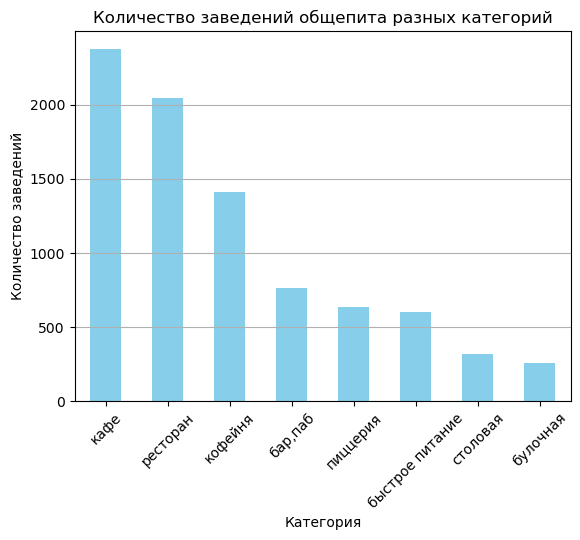

In [64]:
# Построим столбчатую диаграмму для сравнения категорий заведений общепита по количеству объектов:
df_grouped.plot(kind='bar', 
        x='category',
        y='id',
        title='Количество заведений общепита разных категорий',
        legend=False,
        ylabel='Количество заведений',
        xlabel='Категория',
        rot=45,
        color='skyblue'
       )
plt.grid(axis='y')
plt.show()

**Вывод**

Мы видим, что заведения общественного питания Москвы представлены в восьми категориях: `бар,паб`, `булочная`, `быстрое питание`, `кафе`, `кофейня`, `пиццерия`, `ресторан`, `столовая`.
    
Наибольшее количество заведений - `кафе` (2377) и `рестораны` (2042). Меньше всего `булочных` (256) и `столовых` (315). 

---

### Задача 2

Проверим, какие административные районы Москвы присутствуют в данных и исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы, сопроводив результат подходящими визуализациями.

In [67]:
# Группируем данные по адмимнистративным округам и подсчитываем количество:
df_district = df.groupby('district')['id'].count()

# Сортируем данные по количеству заведений (для линейчастой диаграммы нам понадобится сортировка по возрастанию):

df_district = df_district.sort_values(ascending=True)

print(df_district)

district
Северо-Западный АО      409
Юго-Западный АО         709
Юго-Восточный АО        714
Восточный АО            798
Западный АО             850
Северо-Восточный АО     890
Южный АО                892
Северный АО             899
Центральный АО         2242
Name: id, dtype: int64


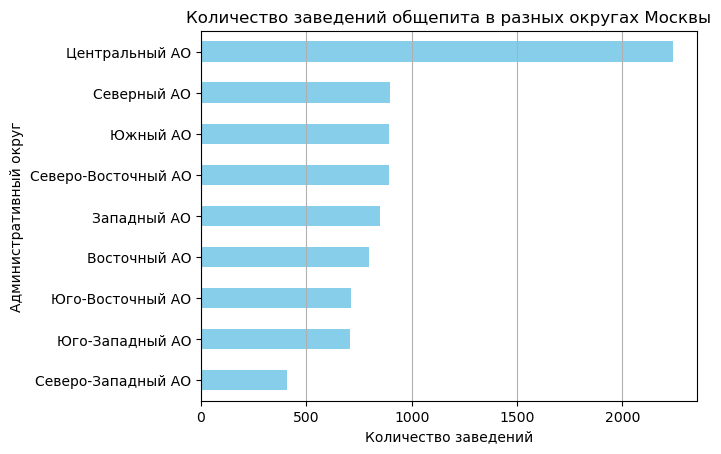

In [68]:
# Построим линейчатую диаграмму для сравнения административных округов Москвы по количеству заведений общепита:

df_district.plot(kind='barh', 
        x='district',
        y='id',
        title='Количество заведений общепита в разных округах Москвы',
        legend=False,
        ylabel='Административный округ',
        xlabel='Количество заведений',
        rot=0,
        color='skyblue'
       )
plt.grid(axis='x')
plt.show()

Из графика видно, что абсолютным лидером по количеству заведений общепита является Центральный административный округ Москвы (2242), меньше всего заведений в Северо-Западном административном округе (409). В остальных семи округах количество заведений колеблется между 700 и 900.

Посмотрим на ЦАО более пристально и посчитаем количество заведений по категориям.

In [70]:
# Фильтруем данные по значению 'Центральный АО' в столбце 'district', группируем данные по категории и подсчитываем количество:
df_CAO = df[df['district'] == 'Центральный АО'].groupby('category')['id'].count()

# Сортируем данные по количеству заведений:

df_CAO = df_CAO.sort_values(ascending=False)

print(df_CAO)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64


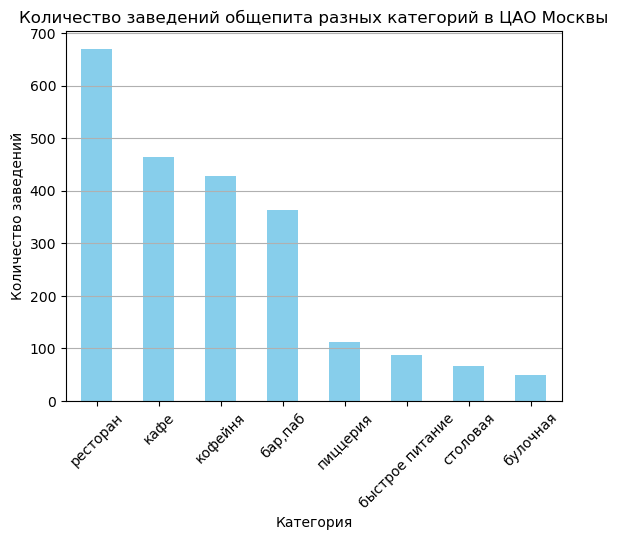

In [71]:
# Построим столбчатую диаграмму для сравнения категорий заведений общепита по количеству объектов в ЦАО Москвы:
df_CAO.plot(kind='bar', 
        x='category',
        y='id',
        title='Количество заведений общепита разных категорий в ЦАО Москвы',
        legend=False,
        ylabel='Количество заведений',
        xlabel='Категория',
        rot=45,
        color='skyblue'
       )
plt.grid(axis='y')
plt.show()

Из графика видно, что в Цетральном административном округе Москвы представлены все категории заведений общепита, при этом преобладают `рестораны` (670) и в меньшинстве (как и по всей Москве) `булочные`.

**Вывод**

Абсолютным лидером по количеству заведений общепита является Центральный административный округ Москвы (2242), меньше всего заведений в Северо-Западном административном округе (409). В остальных семи округах количество заведений колеблется между 700 и 900. 

В Цетральном административном округе Москвы представлены все категории заведений общепита, при этом преобладают `рестораны` (670) и в меньшинстве (как и по всей Москве) `булочные`.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Проверим, каких заведений больше — сетевых или несетевых, а также - какие категории заведений чаще являются сетевыми, построив необходимые визуализации.

In [74]:
df['chain'].value_counts()

chain
0    5200
1    3203
Name: count, dtype: int64

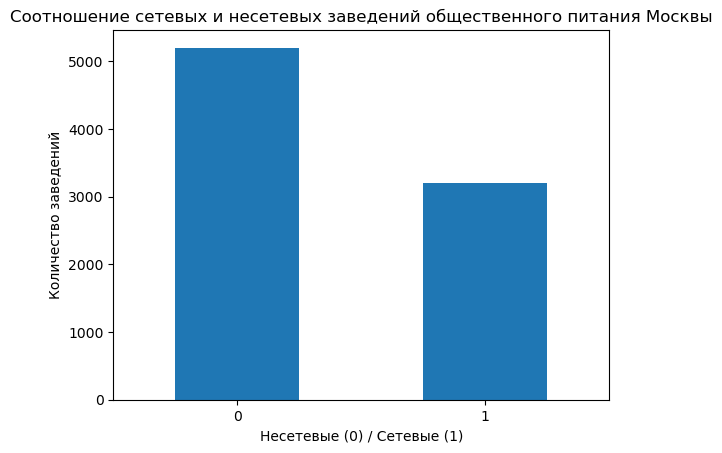

In [75]:
df['chain'].value_counts().plot(kind='bar',
                                title='Соотношение сетевых и несетевых заведений общественного питания Москвы',
                                legend=False,
                                ylabel='Количество заведений',
                                xlabel='Несетевые (0) / Сетевые (1)',
                                rot=0,
                                )
plt.show()

In [76]:
df.groupby('category')['chain'].value_counts()

category         chain
бар,паб          0         596
                 1         168
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1598
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         729
столовая         0         227
                 1          88
Name: count, dtype: int64

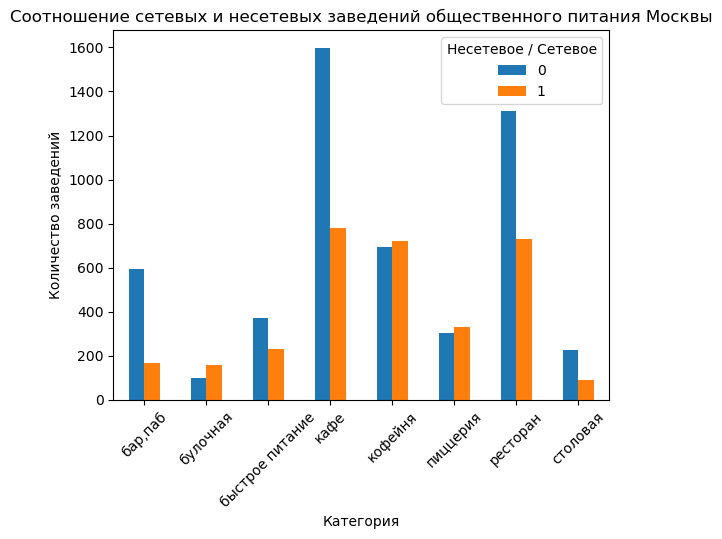

In [77]:
df.groupby('category')['chain'].value_counts().unstack(fill_value=0).plot(kind='bar',
                                title='Соотношение сетевых и несетевых заведений общественного питания Москвы',
                                legend=True,
                                ylabel='Количество заведений',
                                xlabel='Категория',
                                rot=45)
plt.legend(title='Несетевое / Сетевое')
plt.show()

**Вывод**

После изучения соотношения сетевых заведений питаний с несетевыми можно заключить, что в целом по Москве преобладает несетевая форма заведений общественного питания: 5200 несетевых точек против 3203 точек сетевых.

При рассмотрении распределения сетевых заведений по категориям можно отметить, что общее соотношение сохраняется не по всем категориям. Так, сетевые заведения преобладают в категориях `булочная` (157 против 99), `кофейня` (720 против 693) и `пиццерия` (330 против 303). При этом можно заметить, что среди кофеен и пиццерий соотношение сетевых и несетевых заведений почти одинаково.

В тоже време несетевая форма преобладает среди: 

- `баров` (несетевых баров в три раза больше, чем сетевых: 596 к 168);
- `кафе` (несетевых кафе в два раза больше, чем сетевых: 1598 к 779);
- `ресторанов` (1313 ресторанов являются несетевыми, 729 - сетевыми);
- предприятий `быстрого питания` (371 к 232);
- `столовых` (227 к 82).

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Ответим на вопросы, встречаются ли в данных аномальные значения или выбросы и с чем они могут быть связаны. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.

In [80]:
# Посмотрим статистику по столбцу seats:

df['seats'].describe()

count    8403.000000
mean       92.511722
std        94.865547
min         0.000000
25%        55.000000
50%        76.000000
75%        86.000000
max      1288.000000
Name: seats, dtype: float64

Мы видим, что среднее значение (92) и медиана (76) далеки друг от друга, что говорит о несимметричном распределении данных. Минимальное значение - 0 - вполне допустимо, поскольку это могут быть заведения, работающие "на вынос" и не имеющие посадочных мест. Максимальное значение - 1288 - явно нереалистично и, скорее, является выбросом, аномальным значением.

Построим гистограмму и диаграмму размаха, чтобы визуализировать распределение данных.

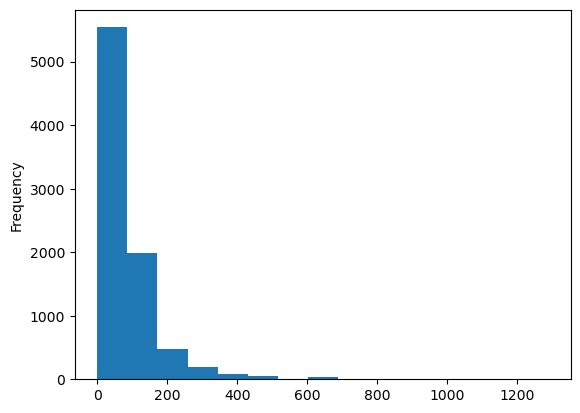

In [82]:
df['seats'].plot(kind='hist',
       bins=15,
       )
plt.show()

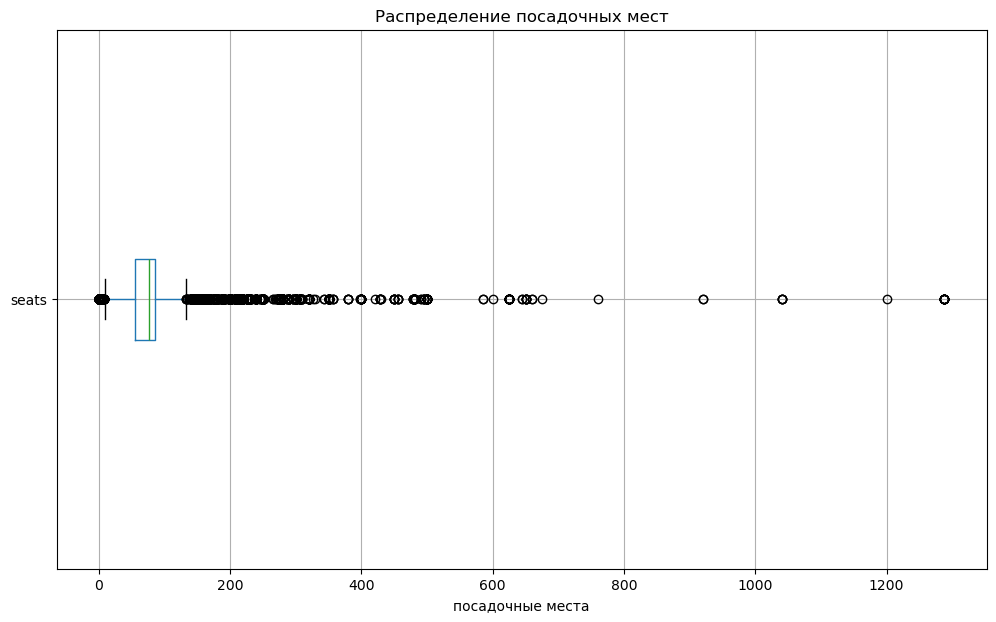

In [183]:
boxplot = df.boxplot(column='seats',
                     vert=False,
                     figsize=(12,7))

boxplot.set_title('Распределение посадочных мест')
boxplot.set_xlabel('посадочные места')

plt.show()

Согласно графикам распределения мы видим, что данные по посадочным местам распределены неравнмерно, имеется длинный правый хвост. Значения посадочным мест в "хвосте" кажутся странными. Из жизни мы знаем, что посадочные места в количестве 300-400 могут втречатся только в крупных ресторанах, а более высокие значения скорее говорят об ошибке в данных. Предлагаем провести фильтрацию данных, исключив выбросы, как ошибочные значения, природа появления которых нам не ясна. Для этого, посчитаем межвартильный размах, определим границы выбросов и отфильтруем данные. Поскольку мы имеем дело с данными высокой вариабельности, то для определения верхнего и нижнего порогов выбросов используем коэффициент 3.0. 

In [85]:
# расчет квартилей
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1

# определение границ выбросов
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# фильтрация выбросов
df_filtered = df[(df['seats'] >= lower_bound) & (df['seats'] <= upper_bound)]

Посмотрим статистику по столбцу seats.

In [87]:
# Посмотрим статистику по столбцу seats:

df_filtered['seats'].describe()

count    7542.000000
mean       68.418854
std        32.152732
min         0.000000
25%        50.000000
50%        65.000000
75%        86.000000
max       178.000000
Name: seats, dtype: float64

Повторим пострение графиков на отфильтрованных данных.

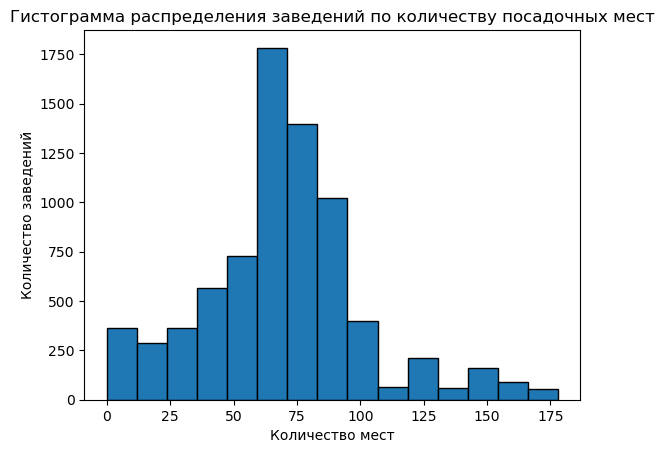

In [89]:
df_filtered['seats'].plot(kind='hist',
       bins=15,
       title='Гистограмма распределения заведений по количеству посадочных мест',
       xlabel='Количество мест',
       ylabel='Количество заведений',
       edgecolor='black'
       )
plt.show()

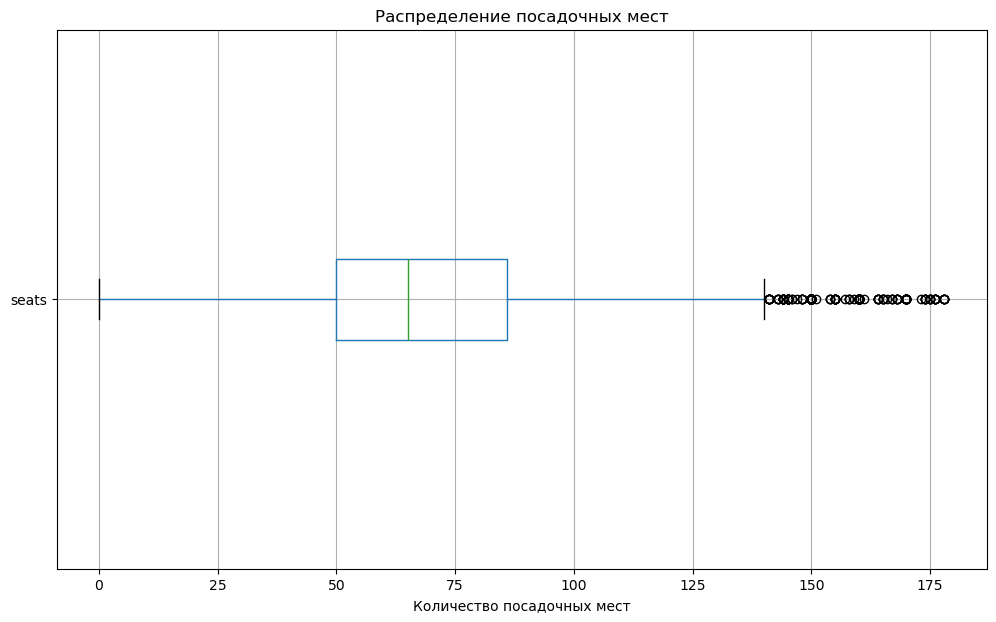

In [90]:
boxplot = df_filtered.boxplot(column='seats',
                     vert=False,
                     figsize=(12,7))

boxplot.set_title('Распределение посадочных мест')
boxplot.set_xlabel('Количество посадочных мест')

plt.show()

Теперь мы видим, что среднее значение (68) и медиана (65) достаточно близки друг к другу, что говорит о более симметричном распределении данных после фильтрации выбросов. Поскольку при расчетах для определения верхнего и нижнего порогов выбросов мы использовали увеличенный коэффициент 3.0, мы сохранили больше  данных после фильтрации.Минимальное значение - 0 - вполне допустимо, поскольку это могут быть заведения, работающие "на вынос" и не имеющие посадочных мест. Максимальное значение - 178, что вполне подходит для ресторанов. Стандартное отклонение достаточно велико (32), что говорит о том, что данные разнообразны, что также вполне объяснимо, если сравнивать кофейни и рестораны.

Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. 

In [92]:
df_filtered.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           76.0
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

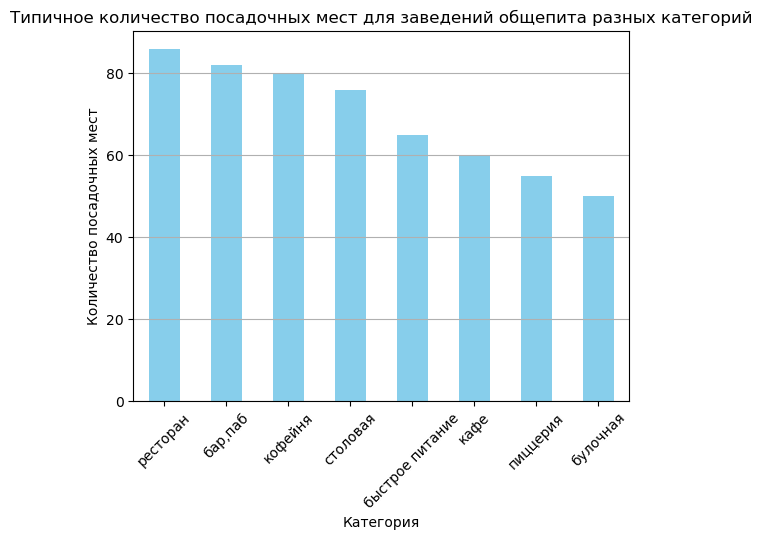

In [93]:
df_filtered.groupby('category')['seats'].median().sort_values(ascending=False).plot(kind='bar', 
        x='category',
        y='seats',
        title='Типичное количество посадочных мест для заведений общепита разных категорий',
        legend=False,
        ylabel='Количество посадочных мест',
        xlabel='Категория',
        rot=45,
        color='skyblue'
       )
plt.grid(axis='y')
plt.show()

**Вывод**

Типичное количество посадочных мест для заведению любой категории начинается пятидесяти. Для `булочных`, `пиццерий` и `кафе` типичное количество мет для посетителей - от 50 до 60. Для заведений `быстрого питания` `кофеен` и `столовых` типичное количество мет для посетителей - от 60 до 80. Для баров и ресторанов в среднем необходимо предусмотреть более 80 посадочных мест.

---

### Задача 5

Исследуеv рейтинг заведений и визуализируем распределение средних рейтингов по категориям заведений. Ответим на вопрос, сильно ли различаются усреднённые рейтинги для разных типов общепита.

In [96]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float64

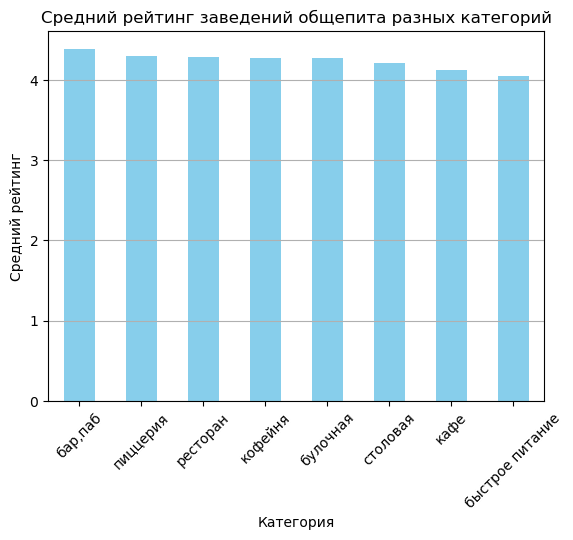

In [97]:
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar', 
        x='category',
        y='rating',
        title='Средний рейтинг заведений общепита разных категорий',
        legend=False,
        ylabel='Средний рейтинг',
        xlabel='Категория',
        rot=45,
        color='skyblue'
       )
plt.grid(axis='y')
plt.show()

**Вывод**

Мы видим, что средний ретинг заведений разных категорий различается не сильно - от 4.0 у заведений `быстрого питания` до 4.4 у `баров и пабов`. Рейтинг `пиццерий` и `ресторанов` составляяет 4.3, `кофеен` и `булочных` - 4.27, `столовых` - 4.2, `кафе` - 4.1. Однако, при оценке среднего рейтинга стоит иметь ввиду, что у разных заведений разная целевая аудитория, по разному оценивающая заведения питания (кто-то готов поставить высшую оценку столовой, если там кормят "по-домашнему", а кто-то "снимет бал", если ему не улыбался официант в ресторане).

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Для этого построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, локация (административный округ Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. После этого выберем самую сильную связь и проверим её.

In [100]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7542 entries, 0 to 8405
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7542 non-null   object 
 1   name               7542 non-null   object 
 2   category           7542 non-null   object 
 3   address            7542 non-null   object 
 4   district           7542 non-null   object 
 5   hours              7542 non-null   object 
 6   rating             7542 non-null   float64
 7   chain              7542 non-null   int8   
 8   seats              7542 non-null   int16  
 9   price              2947 non-null   object 
 10  avg_bill           3381 non-null   object 
 11  middle_avg_bill    2770 non-null   float64
 12  middle_coffee_cup  486 non-null    float64
 13  is_seats           7542 non-null   int64  
 14  is_24_7            7542 non-null   int64  
dtypes: float64(3), int16(1), int64(2), int8(1), object(8)
memory usage: 847.0+ KB

С точки зрения статистики нам нужно проверить корреляцию между непрерывной количественной переменной rating и:

- категориальными переменными category, district, chain, is_24_7;
- ранговой (порядковой) переменной price;
- дискретной количественной переменной seats.

Для проверки корреляции подойдет универсальный метод phik_matrix().

In [102]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_filtered[['category', 'district', 'rating', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.230338
district,0.201800
category,0.195637
is_24_7,0.154636
seats,0.139633
chain,0.111844


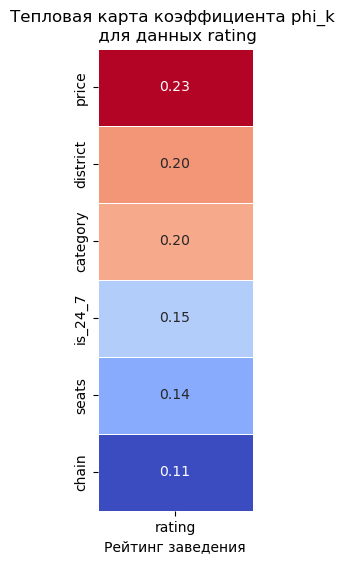

In [103]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведений
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Наибольшую связь с рейтингом показывает переменная `price` (уровень цен), хотя эта связь достаточно слабая. 

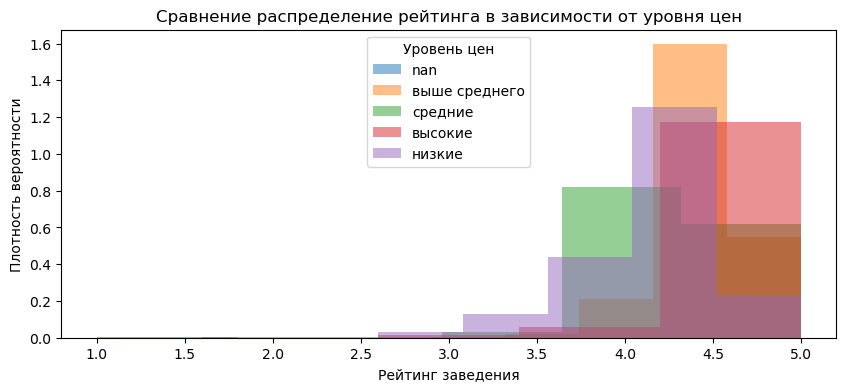

In [105]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика

plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения price
for i in df_filtered['price'].unique():
    # Фильтруем данные по значению столбца price
    df_filtered.loc[df_filtered['price'] == i, 'rating'].plot(
        kind='hist',
        density=True,
        bins=5,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение рейтинга в зависимости от уровня цен')
plt.xlabel('Рейтинг заведения')
plt.ylabel('Плотность вероятности')
plt.legend(title='Уровень цен')
plt.show()

Сравнив распределение рейтинга в зависимости от уровня цен, можно отметить, что в заведениях с `высоким уровнем цен` больше плотность вероятности установки посетителем высокой ретинговой оценки (от 4.2 до максимальных 5.0 баллов). В заведениях с уровнем цен `выше среднего` самая высокая плотность вероятности простановки оценки 4.3 - 4.6 баллов. В заведениях с `низкими ценами` высокая плотность вероятности простановки оценки 4.0 - 4.5 баллов. Плотность вероятности при оценивании заведений со `средними ценами` ниже, чем в других группах (на уровне 0.7-0.8) и в отличии от других групп показывает возможность более частой простановки оценки 3.7 - 4.0 балла таким заведениям.

В тоже время необходимо помнить, что коэффициент корреляции между уровнем цен и рейтингом составляет всего 0.23, то есть показывает слабую связь между переменными, а во-вторых наличие некоторой связи не означает наличие причинно-следственной связи между уровнем цен и рейтингом.

**Вывод**

Построив и визуализировав матрицу корреляции рейтинга заведения с другими его характеристиками(категория, локация, сетёвость, количество мест, ценовая категория и круглосуточный режим работы), мы установили, что наибольшую связь с рейтингом показывает переменная `price` (уровень цен), хотя эта связь достаточно слабая.

Построив гистограмму, сравнивающую распределение рейтинга в зависимости от уровня цен, с учетом плотности вероятности, мы отметили, что в заведениях с `высоким уровнем цен` больше плотность вероятности установки посетителем высокой ретинговой оценки (от 4.2 до максимальных 5.0 баллов). В заведениях с уровнем цен `выше среднего` самая высокая плотность вероятности простановки оценки 4.3 - 4.6 баллов. В заведениях с `низкими ценами` высокая плотность вероятности простановки оценки 4.0 - 4.5 баллов. Плотность вероятности при оценивании заведений со `средними ценами` в отличии от других групп показывает возможность более частой простановки оценки 3.7 - 4.0 балла таким заведениям.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве (под популярностью будем понимать количество заведений этой сети в регионе). Для них посчитаем значения среднего рейтинга и укажем, к какой категории заведений они относятся, сопроводив результат подходящими визуализациями.

In [108]:
# Из датафрейма отфильтруем сетевые заведения (chain = 1), сгруппируем по названию и категории, 
# для каждой группы посчитаем количество заведений и средний рейтинг, отсортируем по количеству по убыванию и выведем первые 15:

top_chain = df[df['chain']==1].groupby(['name', 'category']).agg({'id':'count','rating':'mean'}).sort_values(by='id', ascending=False).head(15)

print(top_chain)

                                               id    rating
name                                category               
шоколадница                         кофейня   119  4.178151
домино'с_пицца                      пиццерия   76  4.169737
додо_пицца                          пиццерия   74  4.286486
one_price_coffee                    кофейня    71  4.064789
яндекс_лавка                        ресторан   69  3.872464
cofix                               кофейня    65  4.075385
prime                               ресторан   49  4.114286
кофепорт                            кофейня    42  4.147619
кулинарная_лавка_братьев_караваевых кафе       39  4.394872
теремок                             ресторан   36  4.105556
cofefest                            кофейня    31  3.977419
чайхана                             кафе       26  3.946154
буханка                             булочная   25  4.416000
drive_café                          кафе       24  4.025000
кофемания                           кофе

In [109]:
# Сбросим индексы для построения графика:

top_chain = top_chain.reset_index()

In [110]:
# Для линейчатой диаграммы перевернем сортировку столбцов:

top_chain = top_chain.sort_values(by='id', ascending=True)

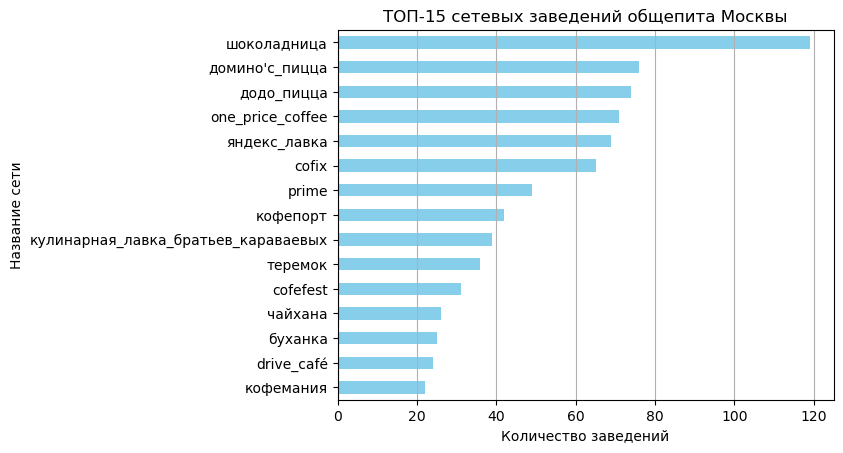

In [111]:
# Построим линейчатую диаграмму для выведения ТОП-15 сетевых заведений общепита Москвы:
top_chain.plot(kind='barh', 
        x='name',
        y='id',
        title='ТОП-15 сетевых заведений общепита Москвы',
        legend=False,
        ylabel='Название сети',
        xlabel='Количество заведений',
        rot=0,
        color='skyblue'
       )
plt.grid(axis='x')

plt.show()

**Вывод**

С помощью группировки, аггрегации и сортировки мы получили ТОП-15 самых популярных сетевых заведений общественного питания Москвы. С большим отрывом возглавляет список `кофейня` `шоколадница` (119 точек по Москве), однако средний рейтинг у сети не самый высокий - 4.1. Второе и третье место занимают `пиццерии` `домино'с_пицца` (76 точек) и `додо_пицца` (74 точки). Самый высокий средний рейтинг среди топовых сетей у `кофейни` `кофемания` - 4.46, а самый низкий - у `ресторана` `яндекс_лавка` - 3.87.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от локации заведения, проанализируем цены в Центральном административном округе и других. Ответим на вопрос, как удалённость от центра влияет на цены в заведениях, сопроводив результат подходящими визуализациями.


In [114]:
# Группируем данные по адмимнистративным округам и вычисляем средний чек:
df_district_avg_bill = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=True)

print(df_district_avg_bill)

district
Юго-Восточный АО        654.097938
Северо-Восточный АО     716.611296
Юго-Западный АО         792.561702
Восточный АО            820.626923
Северо-Западный АО      822.222930
Южный АО                834.398089
Северный АО             927.959627
Западный АО            1053.225490
Центральный АО         1191.057547
Name: middle_avg_bill, dtype: float64


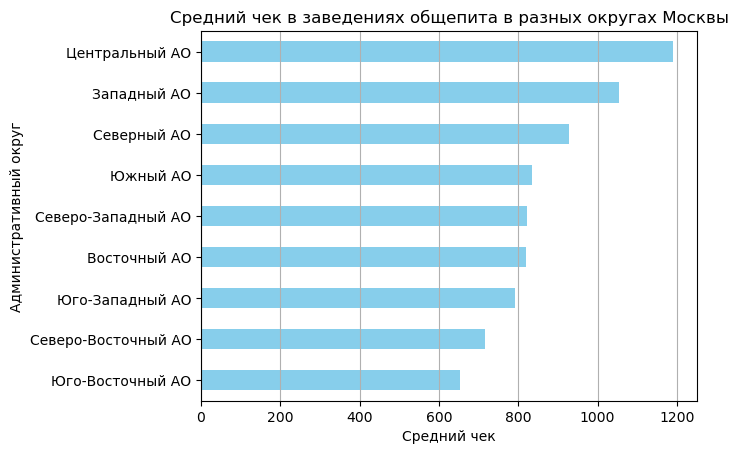

In [115]:
# Построим линейчатую диаграмму для сравнения административных округов Москвы по среднему чеку в заведениях общепита:

df_district_avg_bill.plot(kind='barh', 
        x='district',
        y='middle_avg_bill',
        title='Средний чек в заведениях общепита в разных округах Москвы',
        legend=False,
        ylabel='Административный округ',
        xlabel='Средний чек',
        rot=0,
        color='skyblue'
       )
plt.grid(axis='x')
plt.show()

**Вывод**

Сгруппировав данные по адмимнистративным округам и вычислив средний чек, приходим к выводу, что цены в заведениях общепита Центрального административного округа самые высокие по Москве. По мере удаления от центра средние цены снижаются. Самые дешевые цены в заведениях расположенных в Юго-Восточном административном округе.

---

### Промежуточный вывод

Итак, изучив рынок общественного питания можно сделать следующие промежуточные выводы:

1. Заведения общественного питания Москвы представлены в восьми категориях: `бар,паб`, `булочная`, `быстрое питание`, `кафе`, `кофейня`, `пиццерия`, `ресторан`, `столовая`. Наибольшее количество заведений - `кафе` (2377) и `рестораны` (2042). Меньше всего `булочных` (256) и `столовых` (315).

2. Абсолютным лидером по количеству заведений общепита является Центральный административный округ Москвы (2242), меньше всего заведений в Северо-Западном административном округе (409). В остальных семи округах количество заведений колеблется между 700 и 900. В Цетральном административном округе Москвы представлены все категории заведений общепита, при этом преобладают `рестораны` (670) и в меньшинстве (как и по всей Москве) `булочные`.

3. В Центральном административном округе цены в заведениях общепита самые высокие по Москве. По мере удаления от центра средние цены снижаются. Самые дешевые цены в заведениях расположенных в Юго-Восточном административном округе.

4. В целом по Москве преобладает несетевая форма заведений общественного питания: 5200 несетевых точек против 3203 точек сетевых. При рассмотрении распределения сетевых заведений по категориям можно отметить, что общее соотношение сохраняется не по всем категориям. Так, сетевые заведения преобладают в категориях `булочная` (157 против 99), `кофейня` (720 против 693) и `пиццерия` (330 против 303). При этом можно заметить, что среди кофеен и пиццерий соотношение сетевых и несетевых заведений почти одинаково. Несетевая форма преобладает среди `баров`, `кафе`, `ресторанов`, предприятий `быстрого питания`, `столовых`.

5. ТОП-15 самых популярных сетевых заведений общественного питания Москвы с большим отрывом возглавляет `кофейня` `шоколадница` (119 точек по Москве), однако средний рейтинг у сети не самый высокий - 4.1. Второе и третье место занимают `пиццерии` `домино'с_пицца` (76 точек) и `додо_пицца` (74 точки). Самый высокий средний рейтинг среди топовых сетей у `кофейни` `кофемания` - 4.46, а самый низкий - у `ресторана` `яндекс_лавка` - 3.87.

6. Типичное количество посадочных мест для заведению любой категории начинается с пятидесяти. Для `булочных`, `пиццерий` и `кафе` типичное количество мет для посетителей - от 50 до 60. Для заведений `быстрого питания` `кофеен` и `столовых` типичное количество мет для посетителей - от 60 до 80. Для баров и ресторанов в среднем необходимо предусмотреть более 80 посадочных мест.

7. Средний ретинг заведений разных категорий различается не сильно - от 4.0 у заведений `быстрого питания` до 4.4 у `баров и пабов`. Рейтинг `пиццерий` и `ресторанов` составляяет 4.3, `кофеен` и `булочных` - 4.27, `столовых` - 4.2, `кафе` - 4.1.

8. Наибольшую связь с рейтингом показывает уровень цен (переменная `price`), хотя эта связь достаточно слабая. Можно отметить, что в заведениях с `высоким уровнем цен` больше плотность вероятности установки посетителем высокой ретинговой оценки (от 4.2 до максимальных 5.0 баллов). В заведениях с уровнем цен `выше среднего` самая высокая плотность вероятности простановки оценки 4.3 - 4.6 баллов. В заведениях с `низкими ценами` высокая плотность вероятности простановки оценки 4.0 - 4.5 баллов. Плотность вероятности при оценивании заведений со `средними ценами` в отличии от других групп показывает возможность более частой простановки оценки 3.7 - 4.0 балла таким заведениям.

## 4. Итоговый вывод и рекомендации

**1. Общий обзор проделанной работы.**

В ходе исследования был проведен анализ рынка общественного питания Москвы по состоянию на лето 2022 года. На основе данных сервисов Яндекс Карты и Яндекс Бизнес была проанализирована информация о 8.4 тысяч заведений общественного питания разных категорий, работающих во всех административных округах Москвы. При анализе акчент был сделан на такие характеристики заведений как: категория, локация, уровень цен, наличие франшизы, режим работы (круглосуточный или нет), количество посадочных мест, рейтинг у клиентов.

**2. Ответы на исследовательские вопросы, или главные выводы.**

В ходе исследования мы пришли к следующим выводам, характеризующим заведения общественного питания Москвы:

- Заведения общественного питания Москвы представлены в восьми категориях: `бар,паб`, `булочная`, `быстрое питание`, `кафе`, `кофейня`, `пиццерия`, `ресторан`, `столовая`. Наибольшее количество заведений - `кафе` (2377) и `рестораны` (2042). Меньше всего `булочных` (256) и `столовых` (315).

- Абсолютным лидером по количеству заведений общепита является Центральный административный округ Москвы (2242), меньше всего заведений в Северо-Западном административном округе (409). В остальных семи округах количество заведений колеблется между 700 и 900. В Цетральном административном округе Москвы представлены все категории заведений общепита, при этом преобладают `рестораны` (670) и в меньшинстве (как и по всей Москве) `булочные`.

- В Центральном административном округе цены в заведениях общепита самые высокие по Москве. По мере удаления от центра средние цены снижаются. Самые дешевые цены в заведениях расположенных в Юго-Восточном административном округе.

- В целом по Москве преобладает несетевая форма заведений общественного питания, при этом сетевые заведения преобладают в категориях `булочная`, `кофейня` и `пиццерия`. 

- Список самых популярных сетевых заведений общественного питания Москвы возглавляют `кофейни` и `пиццерии`.

- Типичное количество посадочных мест для заведению любой категории начинается с пятидесяти. При этом для баров и ресторанов в среднем необходимо предусмотреть более 80 посадочных мест.

- Средний ретинг заведений разных категорий различается не сильно - от 4.0 у заведений `быстрого питания` до 4.4 у `баров и пабов`. Наибольшую связь с рейтингом показывает уровень цен, хотя эта связь достаточно слабая и не является причинно-следственной. 

**3. Рекомендации на основе анализа данных.**

В качестве рекомендаций можно отметить следующее:

- Самым востребованным районом для размещения заведений общепита является Центральный административный округ: с одной стороны здесь сосредоточена целевая аудитория, которую не отпугивают высокие цены, с другой стороны здесь самая большая конкуренция, особенно среди ресторанов. Если искать локацию с меньшей конкуренцией, то можно обратить внимание на Северо-Западный административный округ.

- Если выбирать сетевую форму и развивать франшизу, то можно обратить внимание на рынок кофен и пиццерий - именно эти категории успешнее всего развиваются как сети. Если делать выбор в пользу уникальных заведений, то лучше всего себя чувствуют в этом сегмете бары и рестораны.

- При выборе помещений стоит расчитывать на вместимость от 50 до 80 посадочных мест для посетителей и учитвать категорию заведения. 